
# Project: No-Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limit">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project we will be analyzing data for associated with the medical appointments. No-Show Appointments is a dataset that collects information of 100k medical appointments in Brazil. The questions planned to explore are: 
>- What is the proportion of patients who showed up vs no-showed up  to the appointments?
>- What factors could help us to predict if a patient will show up for their schedule appointment?



In [65]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [66]:
# Loading data and printing out a few lines. 

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Findings**: The name of the Columns look pretty Standard however the column No-show should be renamed for an easier work eg. "No_show"
>There is an AppointmenID column which is a unique identifier for each row. Each of the columns are quite descriptive:

>-ScheduledDay tells us on what day the patient set up their appointment

>>ScheduledDay and AppointmenDay have some weird character (T & Z) that should be removed

>-Neighborhood indicates the location of the hospital.

>-Scholarship indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

>-No-show: ‘No’ if the patient showed up to their appointment. ‘Yes’ if they did not show up. It is better to convert them to a numeric data type to work easier with the operations


In [67]:
# Performing  operations to inspect data types
# Looking  for instances of missing or possibly errant data.

#Summarizing statistics of the dataframe
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Findings**: The data look clean. No surprises except for some values on the Age Column. The lowest value is -1 and the highest is 115. Most likely those values are linked to babies  and very old patients. 

In [68]:
# Inspecting data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> **Findings**: There are a couple of strings data types which should be converted to datetime value to make them easier to work

In [69]:
#Geting information about a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **Findings**:  110 527 entries, 14 columns, Non null values

In [70]:
#Geting Duplicates in the  DataFrame
sum(df.duplicated())


0

> **Findings**:  Great! No duplicated values

In [71]:
# Geting Nulls in the  DataFrame
df.isnull().sum().any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000230AA806DD8>,
      dtype=object)

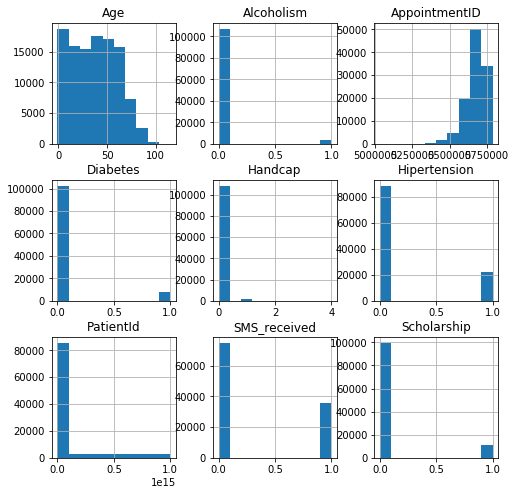

In [72]:
#Plotting an histogram to get a representation of the distribution of the data
df.hist(figsize=(8,8))

> **Findings**: The histogram shows that most of the patients are younger than 60 years old. The number of patients who have one of the sickness is low (Alcoholism, Diabetes, Handcap, Hypertension). Most of the patients are not enrolled in the Brazilian welfare program

### Data Cleaning

>** Renaming columns which are not consistent with the rest of the columns


In [73]:
df1 = df.rename(columns={'No-show':'No_show'})
df1


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


>** converting the No_show / Gender values to numeric data type to work easier with the operations

In [74]:
df1.No_show[df1['No_show'] == 'Yes'] = '0'
df1.No_show[df1['No_show'] == 'No'] = '1'
df1['No_show'] = pd.to_numeric(df1['No_show'])


df1.Gender[df1['Gender'] == 'F'] = '0'
df1.Gender[df1['Gender'] == 'M'] = '1'
df1['Gender'] = pd.to_numeric(df1['Gender'])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A val

In [75]:
##Creating a Mask to make it easy to use in the operations
Showed = df1.No_show == True
No_showed = df1.No_show == False


>** Determine the day of the week for two columns and converting the Scheduleday and Appointment data types weird characters and time

In [76]:
##Determine the day of the week for ScheduleDay and AppointmentDay

df1['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df1['ScheduleDay1'] = df1['ScheduledDay'].dt.day_name()

df1['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df1['AppointmentDay1'] = df1['AppointmentDay'].dt.day_name()


## changing the data type from string to datetime
df1['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df1['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

##Removing time from AppointmentDay and ScheduleDay. Time is not relevant

df1['ScheduledDay'] = df1['ScheduledDay'].apply(lambda x: x.strftime('%m-%d-%Y'))
df1['AppointmentDay'] = df1['AppointmentDay'].apply(lambda x: x.strftime('%m-%d-%Y'))



In [77]:
##Getting a View of How it looks our new dataframe
df1.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,ScheduleDay1,AppointmentDay1
0,2.987250e+13,5642903,0,04-29-2016,04-29-2016,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,Friday
1,5.589978e+14,5642503,1,04-29-2016,04-29-2016,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,Friday
2,4.262962e+12,5642549,0,04-29-2016,04-29-2016,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday,Friday
3,8.679512e+11,5642828,0,04-29-2016,04-29-2016,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday,Friday
4,8.841186e+12,5642494,0,04-29-2016,04-29-2016,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday,Friday


In [78]:
df1.dtypes

PatientId          float64
AppointmentID        int64
Gender               int64
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood       object
Scholarship          int64
Hipertension         int64
Diabetes             int64
Alcoholism           int64
Handcap              int64
SMS_received         int64
No_show              int64
ScheduleDay1        object
AppointmentDay1     object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1  What is the proportion of patients who showed up vs no-showed up  to the appointments?

> Computing the proportions and ploting them in a bar chart for easy visualization

In [79]:
Proportion = Showed.value_counts()
#printing the value before we calculate the porcentage
print (Proportion[0])
#calculating the porcentage
Sum_Proportion = Proportion[0] + Proportion[1]
Proportion[0] = (Proportion[0]*100) / Sum_Proportion
Proportion[1] = (Proportion[1]*100) / Sum_Proportion


22319


Text(0, 0.5, 'Proportion %')

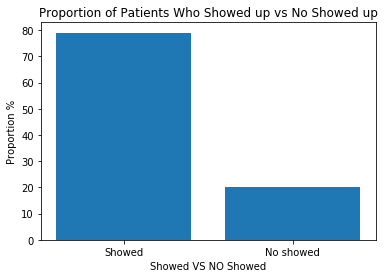

In [80]:
#Plotting a bar graph to get the proportion Showed vs No Showed
plt.bar(['Showed','No showed'], [Proportion[1],Proportion[0]])
plt.title("Proportion of Patients Who Showed up vs No Showed up")
plt.xlabel("Showed VS NO Showed")
plt.ylabel("Proportion %")

### Research Question 2  What factors could help us to predict if a patient will show up for their schedule appointment?

> Analyzing different factors (e.g Neighbourhood, SMS, gender, illnesses) to determine how they can help us to predict if the patient will showed up to the appointment

In [81]:
#Analyzing how Neighbourhood is associated with Showing up to the appointment

Neighbourhood =  df1.groupby(['No_show','Neighbourhood']).count().reset_index('No_show')
Total_df = Neighbourhood.query('No_show==1').sort_values('PatientId', ascending=False)
Total_df = Total_df.drop(['AppointmentID','Gender','ScheduledDay','AppointmentDay','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','ScheduleDay1','AppointmentDay1'  ] , axis=1)
Total_df = Total_df.rename(columns={'PatientId':'Total'})
Total_df = Total_df.head(3)
Total_df

,No_show,Total
Neighbourhood,,
JARDIM CAMBURI,1,6252
MARIA ORTIZ,1,4586
RESISTÊNCIA,1,3525


Text(0, 0.5, 'Number of Showed up Appointments')

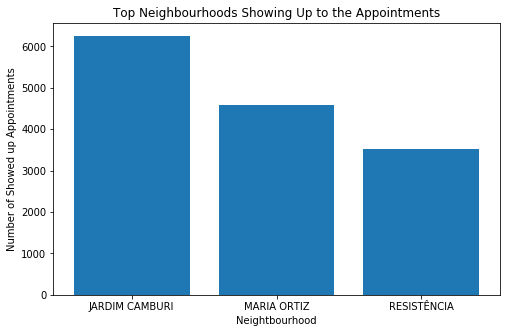

In [82]:
## Plotting the Top Neighbourhoodd with the highest number of Showed up

Total_df.Total
plt.subplots(figsize=(8,5))

plt.bar(Total_df.index, Total_df.Total)
plt.title ('Top Neighbourhoods Showing Up to the Appointments')
plt.xlabel ('Neightbourhood')
plt.ylabel ('Number of Showed up Appointments')

In [83]:
## Analyzing  how the Appointment Day predicts if the pattient will show up  for the appointment

Neighbourhood =  df1.groupby(['No_show','AppointmentDay1']).count().reset_index('No_show')

Total_df  = Neighbourhood.query('No_show==1').sort_values('PatientId', ascending=False)
Total_df  = Total_df .drop(['AppointmentID','Gender','ScheduledDay','AppointmentDay','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','ScheduleDay1','Neighbourhood'] , axis=1)
Total_df = Total_df.rename(columns={'PatientId':'Total'})
Total_df.head()




,No_show,Total
AppointmentDay1,,
Wednesday,1,20774
Tuesday,1,20488
Monday,1,18025
Friday,1,14982
Thursday,1,13909


Text(0, 0.5, 'Number of Showed up Appointments')

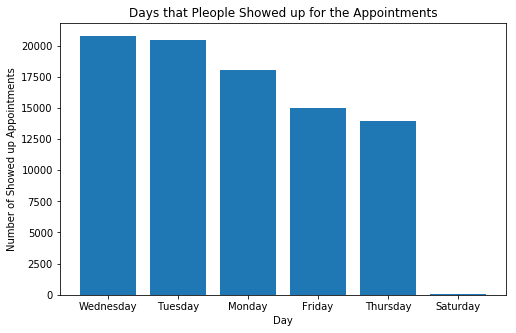

In [84]:
##Plotting the values above in a bar graph

plt.subplots(figsize=(8,5))
plt.bar(Total_df.index, Total_df.Total)
plt.title ('Days that Pleople Showed up for the Appointments')
plt.xlabel ('Day')
plt.ylabel ('Number of Showed up Appointments')




> From the previous graph it seems that most of the patients showed up on Wednesday and Tuesday. A pie graph will help us to visualize clearly the porcentages of showed-up appointments  for each day 

Text(0.5, 1.0, 'Porcentage of Patients who Showed Up Each Day of the Week  ')

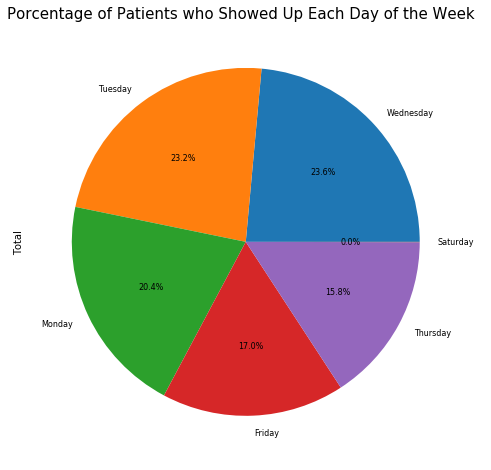

In [91]:
 ## Plotting the porcentages that patients showed up in a week

TotalN = Total_df['Total']
TotalN[1] / TotalN.sum() * 100
pieChart = TotalN.plot.pie(figsize=(8,8), autopct='%1.1f%%', fontsize = 8)
pieChart.set_title("Porcentage of Patients who Showed Up Each Day of the Week  ", fontsize = 15)




> Trying to find if there is any relation between the patients who are sick (Hypertension, Diabetes, Alcholism, Handcap) and the showed up appointment. A visual will help us to easily find the relationship

Text(0.5, 1.0, 'Distribution % of Patients who have an Illnes but Showed up to the Appointments')

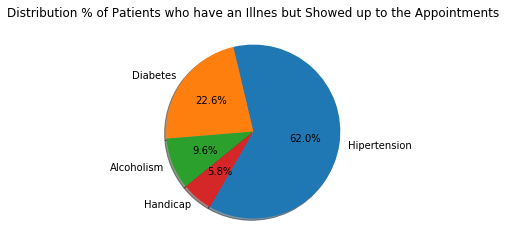

In [86]:
#how is related the sickness to the people who showed up for the appointment?

df_h = df1.query('Hipertension == 1').count()
df_h[0]

df_d = df1.query('Diabetes == 1').count()
df_d[0]

df_a = df1.query('Alcoholism == 1').count()
df_a[0]

df_ha = df1.query('Handcap == 1').count()
df_ha[0]

sizes = [df_h[0], df_d[0], df_a[0], df_ha[0]]
explode = (0, 0, 0, 0)
labels = ['Hipertension','Diabetes','Alcoholism','Handicap']

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=240)

plt.title("Distribution % of Patients who have an Illnes but Showed up to the Appointments")



>Building a visual to  show the  distribution of the patients who dont have one of the sickness but showed up the Appointment

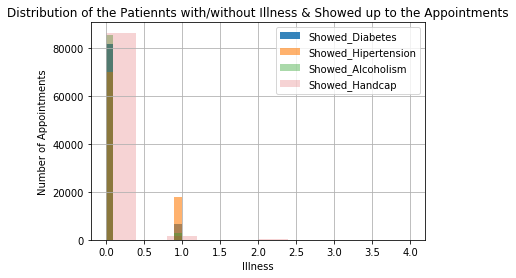

In [87]:
df1.Diabetes[Showed].hist(alpha=0.9, label='Showed_Diabetes')
df1.Hipertension[Showed].hist(alpha=0.6, label='Showed_Hipertension')
df1.Alcoholism[Showed].hist(alpha=0.4, label='Showed_Alcoholism')
df1.Handcap[Showed].hist(alpha=0.2, label='Showed_Handcap')

plt.title("Distribution of the Patiennts with/without Illness & Showed up to the Appointments")
plt.xlabel("Illness")
plt.ylabel("Number of Appointments")
plt.legend()


>Continue building histograms to see the relation with the rest of vaiables (Age, SMS, Gender)

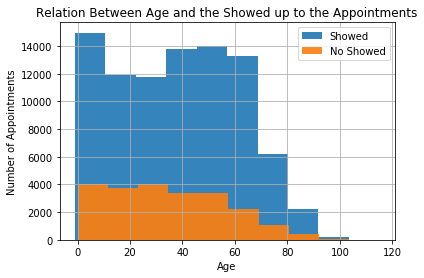

In [88]:
## Analyzing if there is any relation between the Age and the pattients who showed up to the appointment
df1.Age[Showed].hist(alpha=0.9, label='Showed')
df1.Age[No_showed].hist(alpha=0.9, label='No Showed')
plt.title("Relation Between Age and the Showed up to the Appointments")
plt.xlabel("Age")
plt.ylabel("Number of Appointments")
plt.legend()


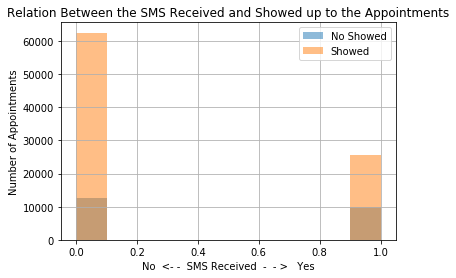

In [89]:
## Analyzing if there is any relation between the SMS Received and the pattients who showed up to the appointment
df1.SMS_received[No_showed].hist(alpha=0.5, label='No Showed')
df1.SMS_received[Showed].hist(alpha=0.5, label='Showed')
plt.title("Relation Between the SMS Received and Showed up to the Appointments")
plt.xlabel("No  <- -  SMS Received  -  - >   Yes")
plt.ylabel("Number of Appointments")
plt.legend()

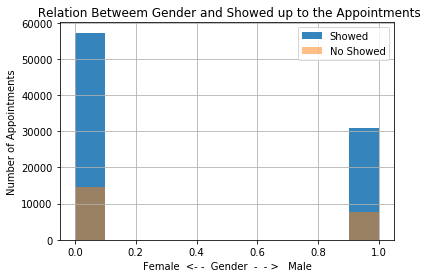

In [90]:
## Analyzing if there is any relation between the Gender and the pattients who showed up to the appointment
df1.Gender[Showed].hist(alpha=0.9,  grid=False, label='Showed')
df1.Gender[No_showed].hist(alpha=0.5, label='No Showed')
plt.title(" Relation Betweem Gender and Showed up to the Appointments")
plt.xlabel("Female  <- -  Gender  -  - >   Male")
plt.ylabel("Number of Appointments")
plt.legend()

<a id='Limit'></a>
## Limitations

> - The data only shows a limited number of illnesses. Other ilnesses could also impact the showed/no-showed appointments
> - There is no information about the working hours each day. The current data shows that patients showed up to the appoitments early in the week. There is no data to find out of if other factors could influence patients to show up on Monday/Tuesday/Wednesday. For instance the working hours on Thursday and Friday could be less  than  the working hour for Monday - Wednesday.




<a id='conclusions'></a>
## Conclusions

> - Nearly 80% of the patients were able to make it to the appointment
> - The three top locations which which have the hights appointments are Jardin Camburi, Maria Ortiz and Resistencia
> - The age is associated with the showed-up appointments. Patients who are above 70 most likely will showed up for the appointment.
> - Appointments Showed up early in the week (Monday, Tuesday, Wednesday) are higher than the rest of the days. Further analysis is requiered to determine if there  is any other variable that could be associated with these days.
> - SMS do not determined if the patientes will show up
> - Most of the patients who do not have any illnesses listed showed up to the appointment.
> - Among the listed of illnesses. Hypertension could be a good factor to predict if the patient will show up for the appointment
> - Women scheduled and showed up for  more appointments than men. The visual shows that gender is one of the factors that could help to predict if the patient will show up 


<a id='resources'></a>
## Resources

> - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
> - https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python
> - https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
> - https://stackoverflow.com/questions/19887353/attributeerror-str-object-has-no-attribute-strftime
